In [38]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [39]:
#read the data
data = pd.read_csv('./data/engineered_data.csv')
#drop source column
data = data.drop('Source', axis=1)

#print the columns types
print(data.dtypes)

Timestamp                         object
Acceleration x (m/s^2)           float64
Acceleration y (m/s^2)           float64
Acceleration z (m/s^2)           float64
Gyroscope x (rad/s)              float64
Gyroscope y (rad/s)              float64
Gyroscope z (rad/s)              float64
Activity                          object
Heart Rate (bpm)                 float64
phone_pos                         object
environment                       object
tired                             object
temporal_mean_acceleration x     float64
temporal_std_acceleration x      float64
temporal_mean_acceleration y     float64
temporal_std_acceleration y      float64
temporal_mean_acceleration z     float64
temporal_std_acceleration z      float64
temporal_mean_gyroscope x        float64
temporal_std_gyroscope x         float64
temporal_mean_gyroscope y        float64
temporal_std_gyroscope y         float64
temporal_mean_gyroscope z        float64
temporal_std_gyroscope z         float64
dtype: object


In [40]:
#print the amount of unique values in the object type columns
for col in data.select_dtypes(include=['object']).columns:
    print(col, data[col].nunique())

Timestamp 41819
Activity 4
phone_pos 2
environment 2
tired 2


In [41]:
# Label encoding
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

#drop timestamp column
data = data.drop('Timestamp', axis=1)
#split the data
X = data.drop('Activity', axis=1)
y = data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print distribution of each activity in the train and test set
print(y_train.value_counts())
print(y_test.value_counts())
#print the percentage of each activity in the train and test set
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))



Activity
3    11757
1     9360
2     7243
0     5095
Name: count, dtype: int64
Activity
3    2990
1    2390
2    1763
0    1221
Name: count, dtype: int64
Activity
3    0.351427
1    0.279779
2    0.216500
0    0.152294
Name: proportion, dtype: float64
Activity
3    0.357484
1    0.285748
2    0.210784
0    0.145983
Name: proportion, dtype: float64


In [42]:
models = {
    'NN': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(5,), (10,), (25,), (100,), (100, 5), (100, 10)],
            'max_iter': [1000, 2000]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [1, 10, 100],
            'tol': [0.001, 0.0001],
            'kernel': ['rbf', 'poly'],
            'max_iter': [1000, 2000]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1, 2, 5, 10]
        }
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'params': {
            'min_samples_leaf': [2, 10, 50, 100, 200],
            'criterion': ['gini', 'entropy']
        }
    },
    'RF': {
        'model': RandomForestClassifier(),
        'params': {
            'min_samples_leaf': [2, 10, 50, 100, 200],
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy']
        }
    },
    'NB': {
        'model': GaussianNB(),
        'params': {}
    }
}


In [43]:
# Perform grid search
best_estimators = {}
for model_name, config in models.items():
    print(f"Training {model_name} model...")
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best params for {model_name}: {grid_search.best_params_}")

    # Cross-validation to print training accuracy
    cross_val_accuracies = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, n_jobs=-1)
    print(f"Cross-validation accuracies for {model_name}: {cross_val_accuracies}")
    print(f"Mean cross-validation accuracy for {model_name}: {cross_val_accuracies.mean():.4f}")

Training NN model...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params for NN: {'hidden_layer_sizes': (100, 10), 'max_iter': 2000}
Cross-validation accuracies for NN: [0.99955164 0.99940218 0.99970109 0.99970109 0.99940218]
Mean cross-validation accuracy for NN: 0.9996
Training SVM model...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\liat1\miniconda3\envs\dl\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best params for SVM: {'C': 100, 'kernel': 'rbf', 'max_iter': 1000, 'tol': 0.001}
Cross-validation accuracies for SVM: [1.         1.         0.99985055 0.99985055 1.        ]
Mean cross-validation accuracy for SVM: 0.9999
Training KNN model...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params for KNN: {'n_neighbors': 2}
Cross-validation accuracies for KNN: [1.         1.         1.         0.99970109 1.        ]
Mean cross-validation accuracy for KNN: 0.9999
Training DT model...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params for DT: {'criterion': 'entropy', 'min_samples_leaf': 2}
Cross-validation accuracies for DT: [0.99970109 0.99985055 1.         1.         1.        ]
Mean cross-validation accuracy for DT: 0.9999
Training RF model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params for RF: {'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 50}
Cross-validation accuracies for RF: [1.         0.99985055

In [44]:
# Evaluate the models on the test set
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name} on test set: {accuracy:.4f}")


Accuracy of NN on test set: 0.9983
Accuracy of SVM on test set: 1.0000
Accuracy of KNN on test set: 0.9999
Accuracy of DT on test set: 1.0000
Accuracy of RF on test set: 1.0000
Accuracy of NB on test set: 0.9974


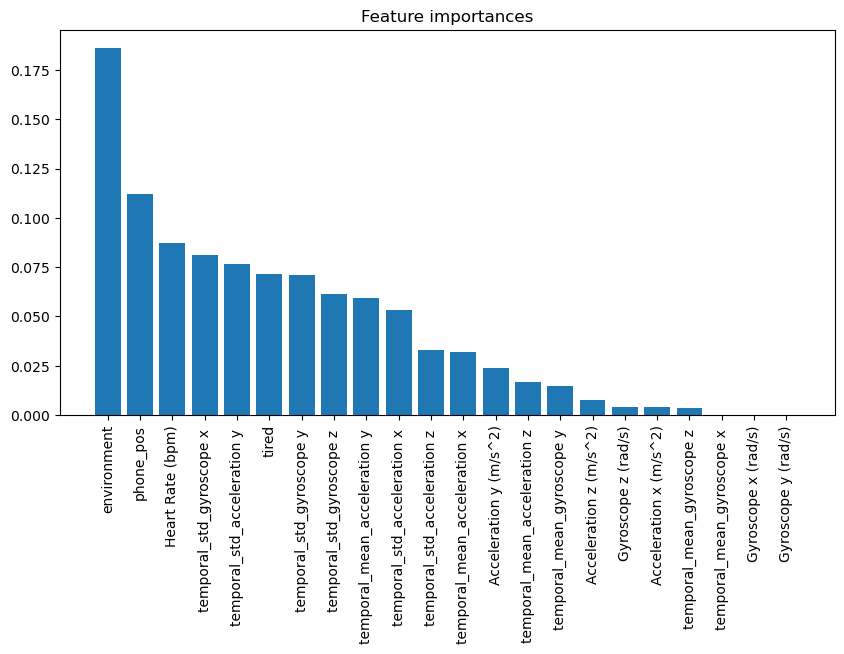

In [45]:
#plot feature importance for random forest
rf = best_estimators['RF']
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title('Feature importances')
plt.show()


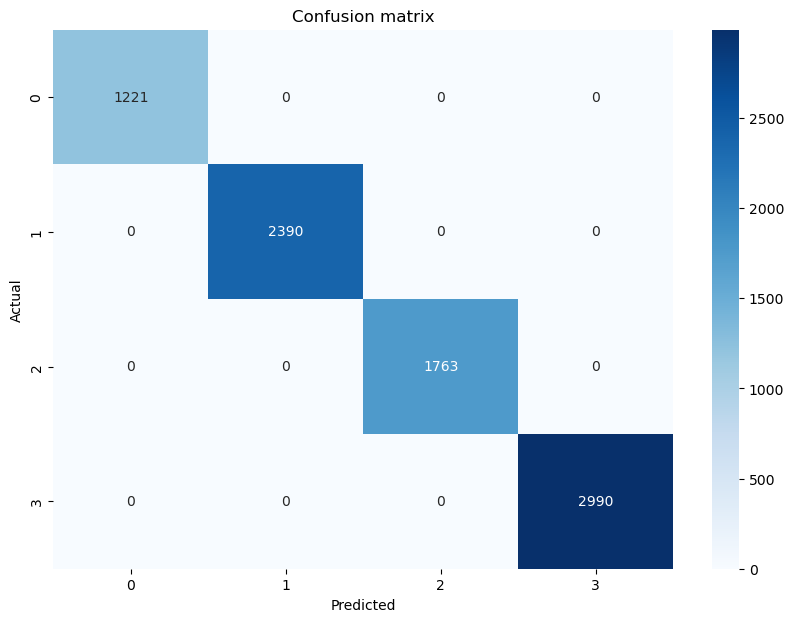

In [46]:
rf = best_estimators['RF']
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()